In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline 

In [3]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv', index_col='PassengerId')
test_df = pd.read_csv('../input/spaceship-titanic/test.csv', index_col='PassengerId')
print('train dataframe dimensions:', train_df.shape)
print('test dataframe dimensions:', test_df.shape)

train dataframe dimensions: (8693, 13)
test dataframe dimensions: (4277, 12)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [5]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train_df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploratory Data Analysis (EDA)

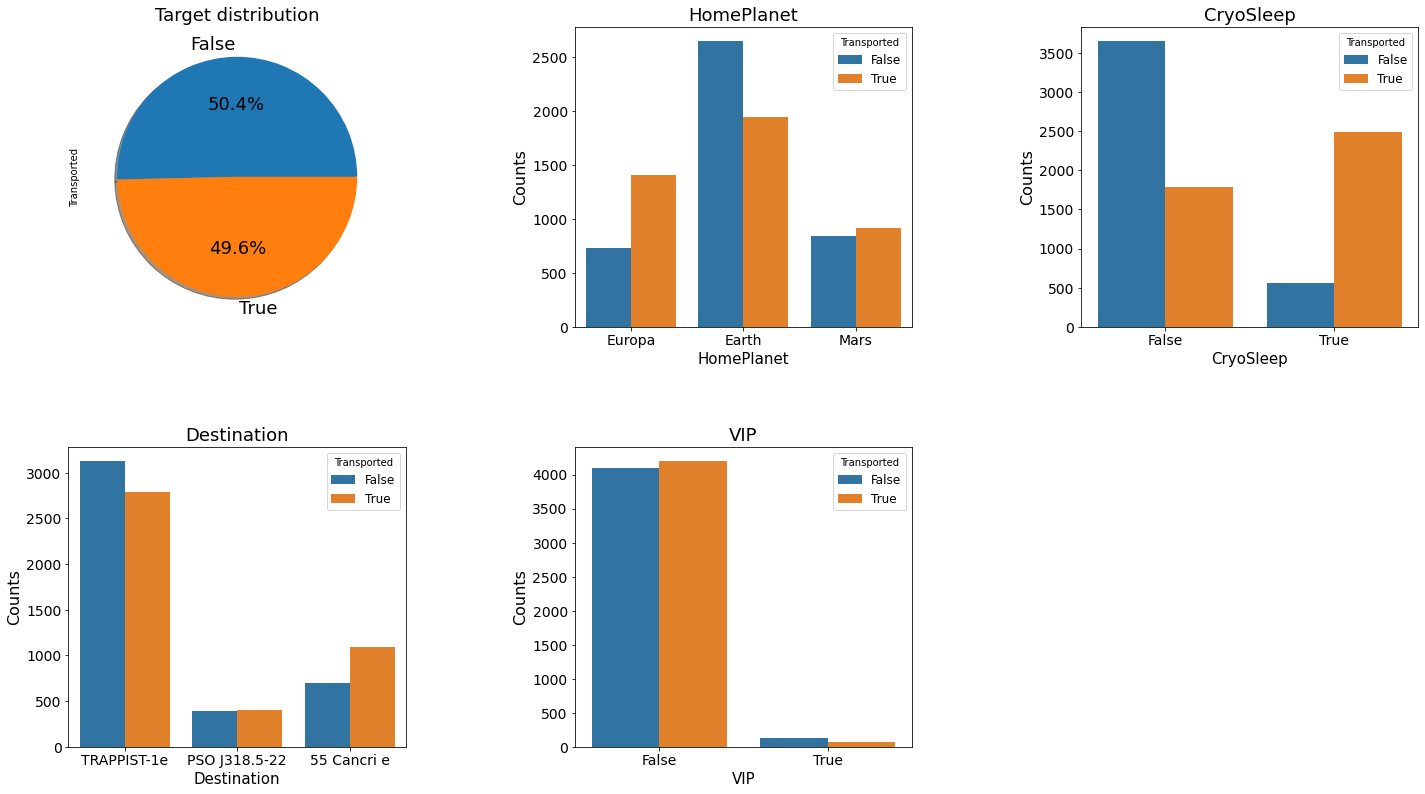

In [7]:
%matplotlib inline 
# Figure size
plt.figure(figsize=(15,5))

# Pie plot
plt.subplot(2, 3, 1)
labels = ('False', 'True')
train_df['Transported'].value_counts().plot.pie(labels=labels,autopct='%1.1f%%', shadow=True,textprops={'fontsize':18}).set_title('Target distribution',fontsize=18 )

# Colounm Homeplanet plot
plt.subplot(2, 3, 2)
sns.countplot(data=train_df, x='HomePlanet', hue='Transported')
plt.title('HomePlanet',fontsize=18)
plt.xlabel('HomePlanet', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

# Column Cryosleep plot
plt.subplot(2, 3, 3)
sns.countplot(data=train_df, x='CryoSleep', hue='Transported')
plt.title('CryoSleep',fontsize=18)
plt.xlabel('CryoSleep', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

# Column Destination plot
plt.subplot(2, 3, 4)
sns.countplot(data=train_df, x='Destination', hue='Transported')
plt.title('Destination',fontsize=18)
plt.xlabel('Destination', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

# Column VIP plot
plt.subplot(2, 3, 5)
sns.countplot(data=train_df, x='VIP', hue='Transported')
plt.title('VIP',fontsize=18)
plt.xlabel('VIP', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

plt.subplots_adjust(left=1.25, bottom=1, right=2.5, top=3, wspace=0.5, hspace=0.4)
plt.show()

# Feature engineering

> True = 1 , False = 0   

In [8]:
train_df['Transported'].replace(False, 0, inplace=True)
train_df['Transported'].replace(True, 1, inplace=True)

In [9]:
def cabin_process(train,test):
  train[['Deck','Num', 'Side']] = train['Cabin'].str.split('/', expand=True)
  test[['Deck','Num', 'Side']] = test['Cabin'].str.split('/', expand=True)

  return train,test

train_df , test_df = cabin_process(train_df,test_df)

train_df.drop(['Cabin','Name'], axis=1, inplace=True)
test_df.drop(['Cabin','Name'], axis=1, inplace=True)

In [10]:
col_to_sum = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df['SumSpends'] = train_df[col_to_sum].sum(axis=1)
test_df['SumSpends'] = test_df[col_to_sum].sum(axis=1)

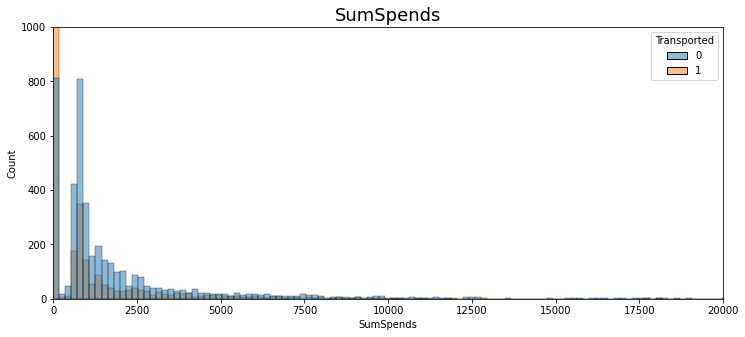

In [11]:
%matplotlib inline 
train_df['Expenditure']=train_df[col_to_sum].sum(axis=1)

fig=plt.figure(figsize=(12,5))
sns.histplot(data=train_df, x='SumSpends', hue='Transported', bins=200)
plt.title('SumSpends',fontsize=18)
plt.ylim([0,1000])
plt.xlim([0,20000])
plt.show()

*   Distribution Chart แสดงสัดส่วนผู้โดยสารที่ใช้จ่ายในส่วนต่างๆทั้งหมด เช่น RoomService, FoodCourt, ShoppingMall, Spa และ VRDeck

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


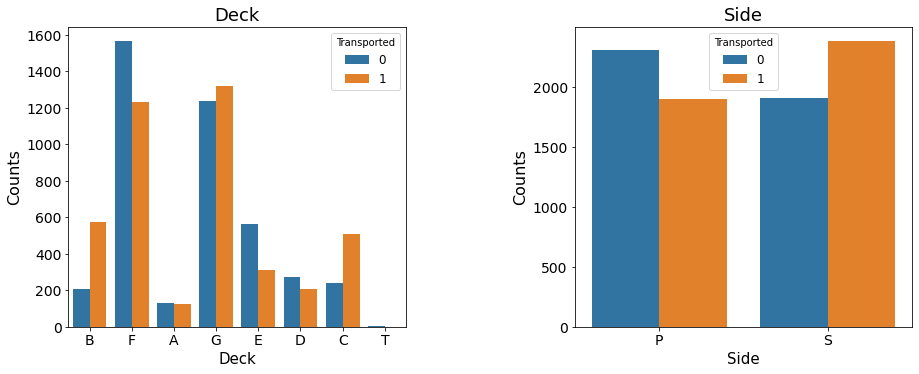

In [12]:
%matplotlib inline 
plt.figure(figsize=(15, 5))

# Colounm Deck plot
plt.subplot(2, 3, 1)
sns.countplot(train_df.Deck,hue=train_df.Transported);
plt.title('Deck',fontsize=18)
plt.xlabel('Deck', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

# Colounm Side plot
plt.subplot(2, 3, 2)
sns.countplot(train_df.Side,hue=train_df.Transported);
plt.title('Side',fontsize=18)
plt.xlabel('Side', fontsize=15);
plt.ylabel('Counts', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='Transported', fontsize=12)

plt.subplots_adjust(left=1.25, bottom=1, right=2.5, top=3, wspace=0.5, hspace=0.4)
plt.show()

# Preparing Data


* Object : HomePlanet, CryoSleep, Destination, VIP, Deck, Num, Side 
* Numeric : Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, SumSpends

In [13]:
object_cols = [col for col in train_df.columns if train_df[col].dtype == 'object' or train_df[col].dtype == 'category']
numeric_cols = [col for col in train_df.columns if train_df[col].dtype == 'float64']

print(f'Object cols -- {object_cols}')
print(f'Numeric cols -- {numeric_cols}')

Object cols -- ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side']
Numeric cols -- ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'SumSpends', 'Expenditure']


In [14]:
train_df[object_cols] = train_df[object_cols].astype('category')
test_df[object_cols] = test_df[object_cols].astype('category')

In [15]:
null_value=train_df.isnull().sum()
null_value

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Num             199
Side            199
SumSpends         0
Expenditure       0
dtype: int64

In [16]:
null_cols = train_df.isnull().sum().sort_values(ascending=False)
null_cols = list(null_cols[null_cols>1].index)
null_cols

['CryoSleep',
 'ShoppingMall',
 'VIP',
 'HomePlanet',
 'Deck',
 'Num',
 'Side',
 'VRDeck',
 'FoodCourt',
 'Spa',
 'Destination',
 'RoomService',
 'Age']

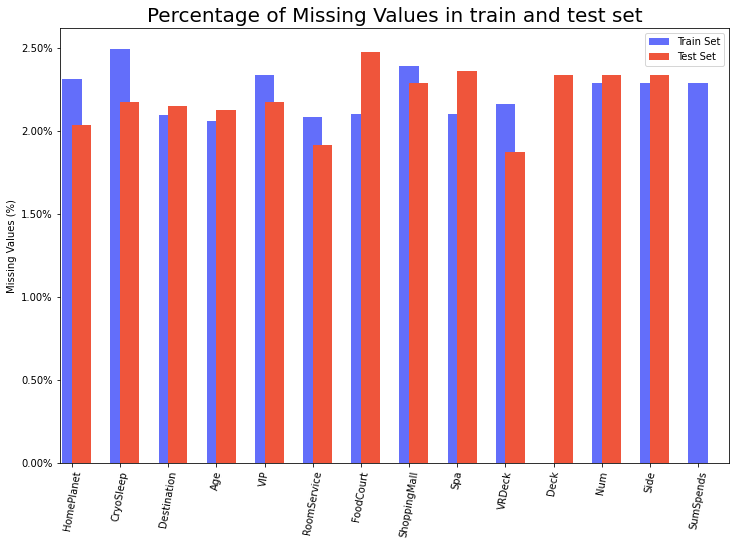

In [17]:
%matplotlib inline 
import matplotlib.ticker as mtick
palette = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
sns.set_palette(palette)
fig,ax = plt.subplots(1,1, figsize=(12,8))
(train_df.isnull().mean()*100).plot(kind='bar', ax=ax, align='center', width=.4)
(test_df.isnull().mean()*100).plot(kind='bar', ax=ax, align='edge',width=.4, color=palette[1])
plt.legend(labels=['Train Set','Test Set'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(axis='x', labelrotation=80)
ax.set_ylabel('Missing Values (%)')
ax.set_title('Percentage of Missing Values in train and test set',fontsize=20);
plt.show()

In [18]:
print(f'Train DF shape: {train_df.shape}')
print(f'Test DF shape: {test_df.shape}')

Train DF shape: (8693, 16)
Test DF shape: (4277, 14)


In [19]:
from sklearn.preprocessing import OrdinalEncoder

oc = OrdinalEncoder()

df_for_encode = pd.concat([train_df, test_df])

df_for_encode[object_cols] = df_for_encode[object_cols].astype('category')

df_for_encode[object_cols] = oc.fit_transform(df_for_encode[object_cols])

del train_df, test_df

train_df = df_for_encode.iloc[:8693, :]
test_df = df_for_encode.iloc[8693: , :]

del df_for_encode

test_df.drop('Transported', inplace=True, axis=1)

In [20]:
print(f'Train DF shape: {train_df.shape}')
print(f'Test DF shape: {test_df.shape}')

Train DF shape: (8693, 16)
Test DF shape: (4277, 15)


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer([("imp", SimpleImputer(strategy='mean'), null_cols)])
    
train_df[null_cols] = ct.fit_transform(train_df[null_cols])
test_df[null_cols] = ct.fit_transform(test_df[null_cols])

In [22]:
null_value=train_df.isnull().sum()
null_value

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
SumSpends       0
Expenditure     0
dtype: int64

In [23]:
X = train_df.copy()
y = X.pop('Transported')

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.3)
kfold = KFold(n_splits=5, shuffle=True, random_state=10) 

# Model selection

*   CatBoost Classifier
*   Decision Tree Classifier
*   Random Forest Classifier
*   LGBM Classifier
*   XGB Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

In [25]:
model_factory = [CatBoostClassifier(verbose=False), 
                 LGBMClassifier(objective='binary'),
                 RandomForestClassifier(n_jobs=-1),
                 XGBClassifier(objective='binary:logistic'),
                 DecisionTreeClassifier()] 
                
val = []
model_name = []

for model in model_factory:
    mf = model.fit(x_train, y_train)
    Pred = mf.predict(x_test)
    scores=cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    print(model.__class__.__name__, " : Train Accuracy: ", accuracy_score(y_test, Pred), " : Validation Accuracy : ", np.mean(scores))
    model_name.append(model.__class__.__name__)
    val.append(np.mean(scores).item())

CatBoostClassifier  : Train Accuracy:  0.8109662576687117  : Validation Accuracy :  0.8065735414954807
LGBMClassifier  : Train Accuracy:  0.8048312883435583  : Validation Accuracy :  0.8003286770747741
RandomForestClassifier  : Train Accuracy:  0.8044478527607362  : Validation Accuracy :  0.7958915365653245
XGBClassifier  : Train Accuracy:  0.7956288343558282  : Validation Accuracy :  0.7939194741166803
DecisionTreeClassifier  : Train Accuracy:  0.7488496932515337  : Validation Accuracy :  0.7436318816762532


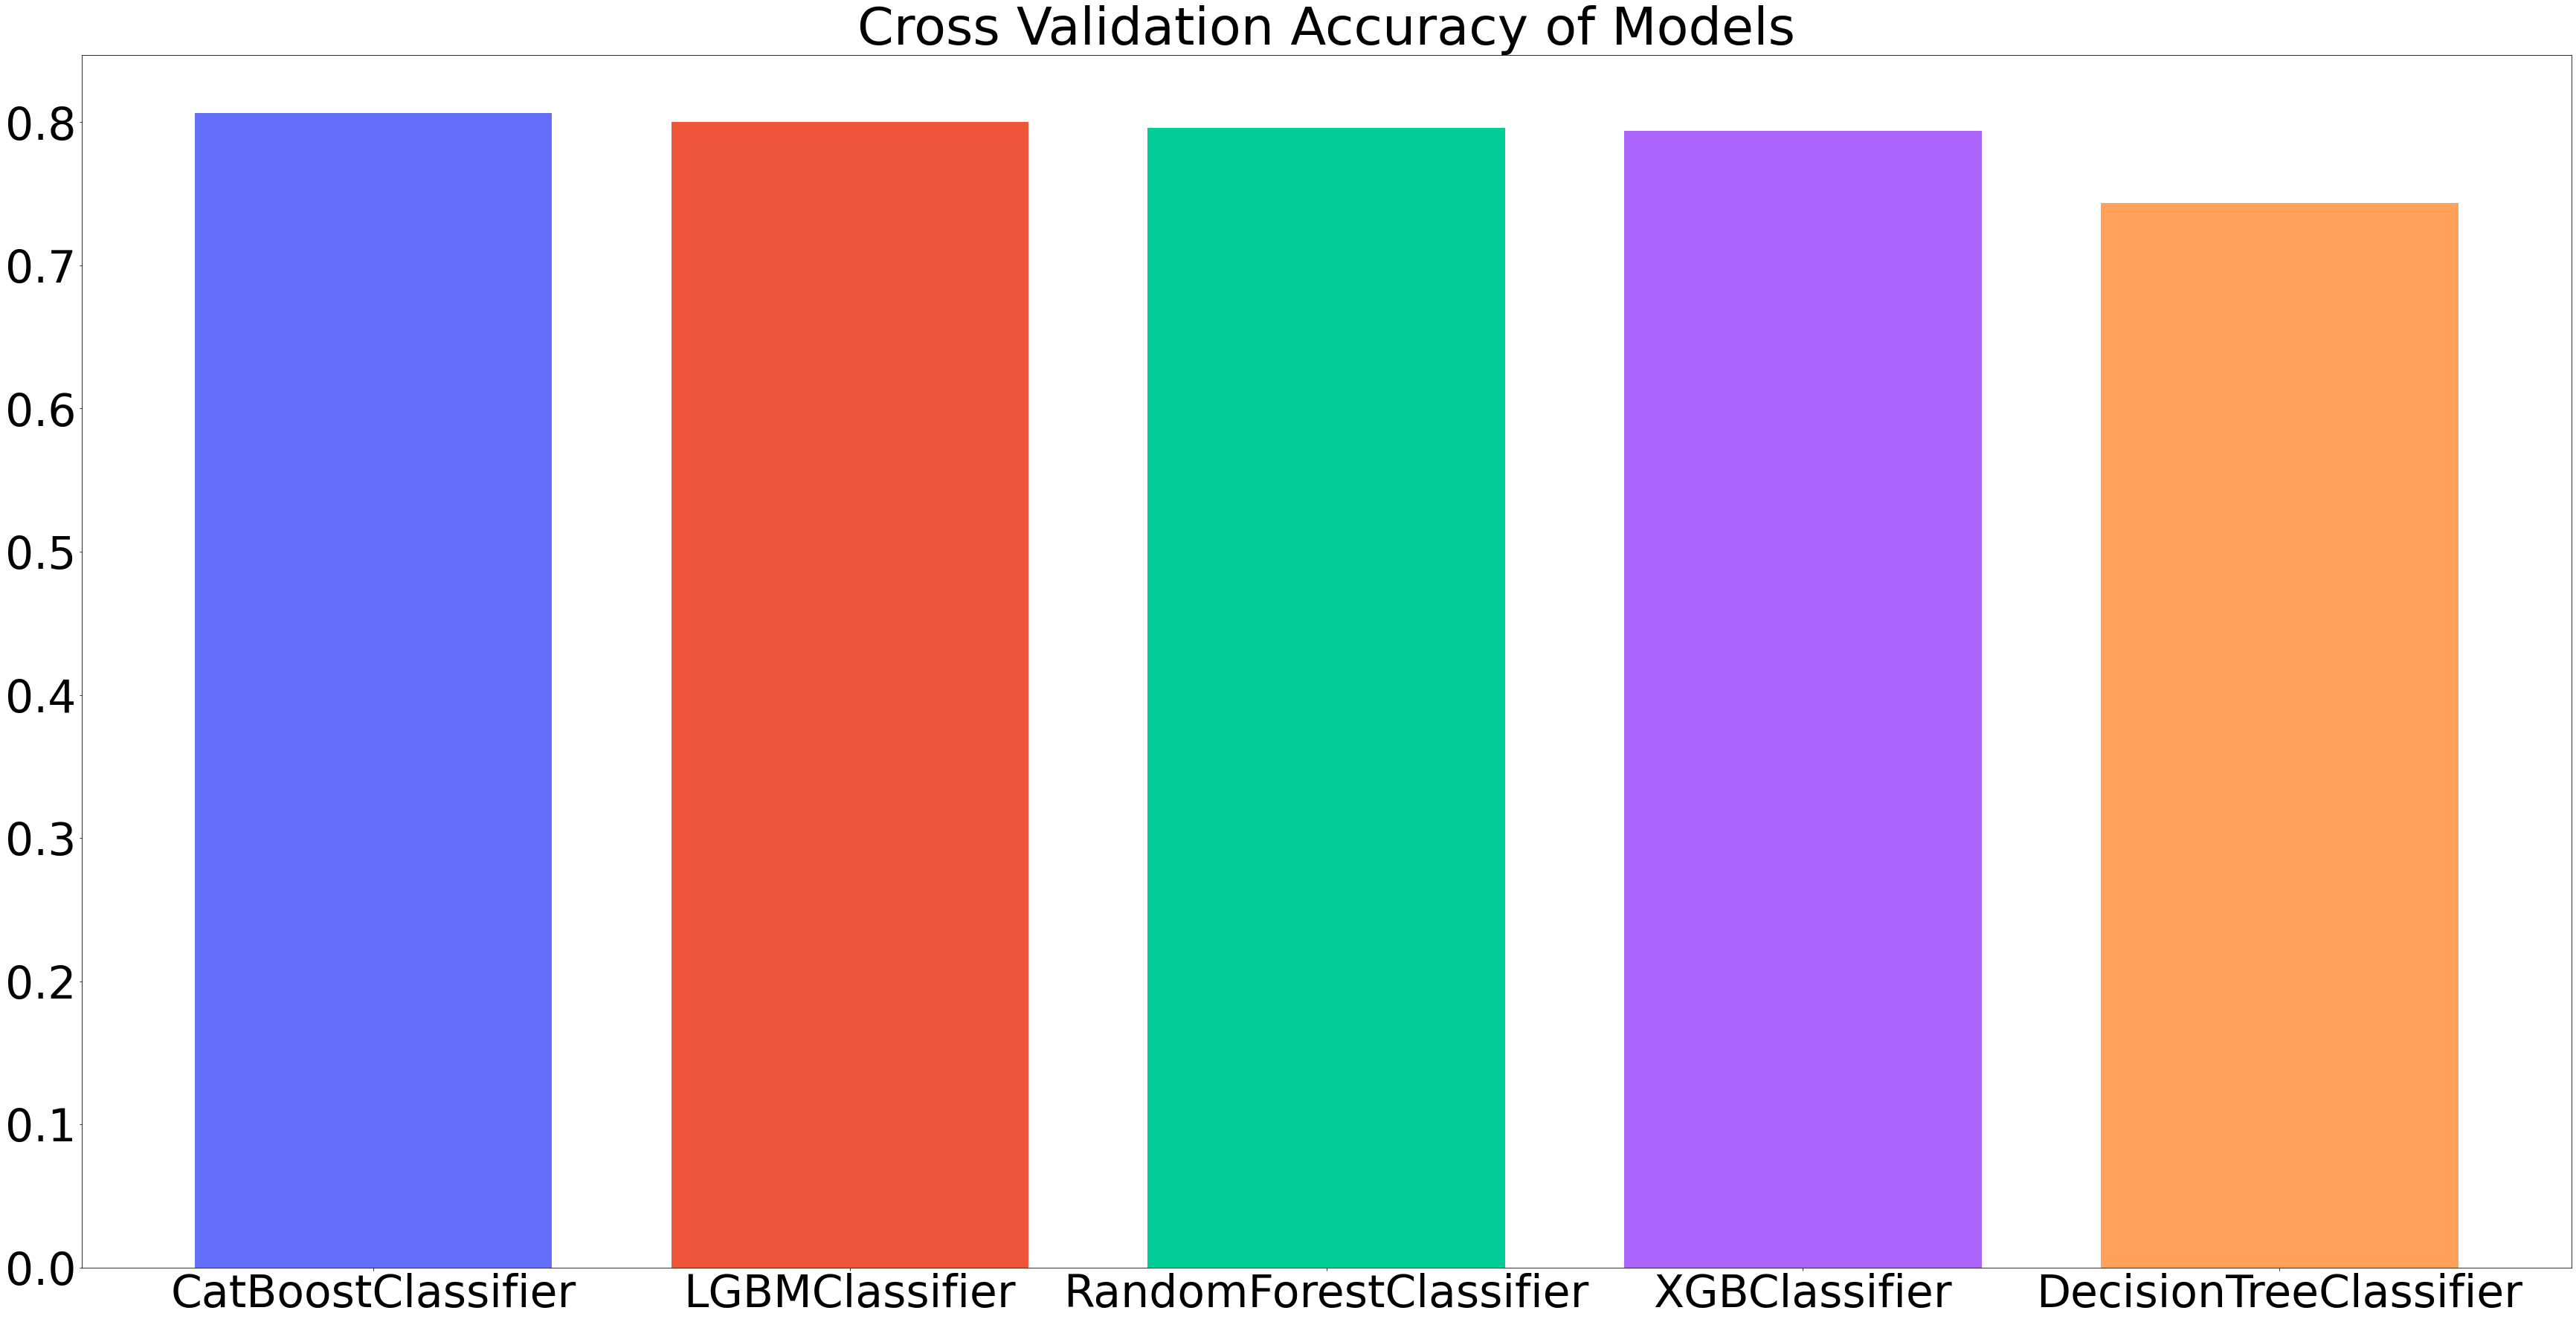

In [26]:
fig = plt.figure(figsize = (60,30))
plt.bar(model_name, val, color=palette, width=0.75)
plt.title('Cross Validation Accuracy of Models',fontsize=70)
plt.tick_params(axis='both', which='major',labelsize=60)
plt.show()


>   * CatBoostClassifier : 0.809
>   * LGBMClassifier : 0.800
>   * RandomForestClassifier : 0.798
>   * XGBClassifier : 0.794
>   * DecisionTreeClassifier : 0.743



<div style="width:100%;text-align: center;"> <img align=middle src="https://cdn.discordapp.com/attachments/756022438050922558/1036279265307664434/unknown.png" alt="Heat beating" > </div>




# Feature selection 

* CryoSleep
* RoomService 
* Spa
* VRDeck
* Deck
* Side
* SumSpends


In [27]:
from sklearn.feature_selection import SequentialFeatureSelector
model_fs = CatBoostClassifier(verbose=False)
sf = SequentialFeatureSelector(model_fs, scoring='accuracy', direction = 'backward')
sf.fit(X, y)

SequentialFeatureSelector(direction='backward',
                          estimator=<catboost.core.CatBoostClassifier object at 0x7f63468a4a90>,
                          scoring='accuracy')

In [28]:
best_features_cat = list(sf.get_feature_names_out())
best_features_cat

['CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'Deck', 'Side', 'Expenditure']

In [29]:
params = {'iterations': [500,1000,1500],'depth':[2,3,7], 
          'learning_rate':[0.01,0.05,0.1], 'l2_leaf_reg': [0.05,0.01]}
model_cat = GridSearchCV(CatBoostClassifier(verbose=False), param_grid=params, scoring='accuracy', cv=kfold, n_jobs=-1)
model_cat.fit(X[best_features_cat],y)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f63467ddd90>,
             n_jobs=-1,
             param_grid={'depth': [2, 3, 7], 'iterations': [500, 1000, 1500],
                         'l2_leaf_reg': [0.05, 0.01],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [30]:
print(model_cat.best_params_)

{'depth': 7, 'iterations': 1500, 'l2_leaf_reg': 0.01, 'learning_rate': 0.01}


# Prediction and Evaluate Model


In [31]:
cat_pred=model_cat.predict(x_test)
print("accuracy_score = ",accuracy_score(y_test.values,cat_pred))

accuracy_score =  0.8665644171779141



* TP = 1067
* FP = 214
* FN = 134
* TN = 1193

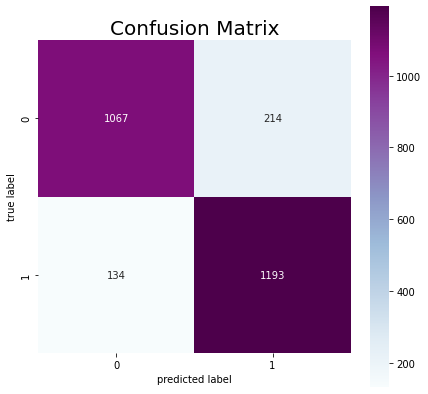

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values,cat_pred)
%matplotlib inline 
plt.figure(figsize=(7,7))
plt.title("Confusion Matrix",fontsize=20)
sns.heatmap(cm, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      1281
         1.0       0.85      0.90      0.87      1327

    accuracy                           0.87      2608
   macro avg       0.87      0.87      0.87      2608
weighted avg       0.87      0.87      0.87      2608



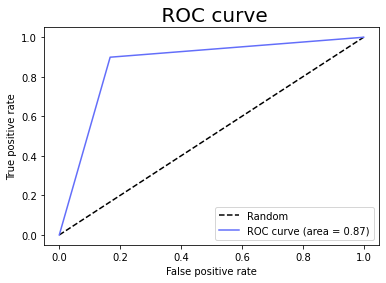

<Figure size 4320x1440 with 0 Axes>

In [34]:
%matplotlib inline 
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, cat_pred)
roc_auc=auc(fpr,tpr)

plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(" ROC curve" ,fontsize=20)
plt.legend(loc='best')
plt.figure(figsize=(60,20))
plt.show()

# Submission

เก็บค่าทำนายลงใน DataFrame และเซฟเป็นไฟล์ CSV 

In [35]:
prediction = model_cat.predict(test_df)
prediction

array([1., 0., 1., ..., 1., 0., 1.])

In [36]:
final = pd.DataFrame()
final.index = test_df.index
final['Transported'] = prediction
final['Transported'].replace(0, False, inplace=True)
final['Transported'].replace(1, True, inplace=True)
final.to_csv('submission.csv')